Exploração dos dados

In [2]:
import pandas as pd
import numpy as np

# Carregando o conjunto de dados
data = pd.read_csv('./matches_brasileirao_serie_a_2022.csv')

# verficando a quantidade de instâncias
instances = data.shape[0]
print('Número de instâncias: ' + str(instances))

# verificando a quantidade de atributos
attributes = data.shape[1]
print('Número de atributos: ' + str(attributes))

# Verificando a presença de dados ausentes
print(data.isna().sum())


Número de instâncias: 380
Número de atributos: 26
match_id                    0
stage                       0
date                        0
team_name_home              0
team_name_away              0
team_home_score             0
team_away_score             0
possession_home             0
possession_away             0
total_shots_home            0
total_shots_away            0
shots_on_target_home        0
shots_on_target_away        0
duels_won_home              0
duels_won_away              0
prediction_team_home_win    0
prediction_draw             0
prediction_team_away_win    0
prediction_quantity         0
location                    0
lineup_home                 0
lineup_away                 0
player_names_home           0
player_numbers_home         0
player_names_away           0
player_numbers_away         0
dtype: int64


Criando variáveis

In [3]:
# Separando atributos desejáveis
parsed_data = data.drop(
  labels=['stage', 'match_id', 'date', 'location', 'lineup_home', 'lineup_away', 'player_names_home', 'player_numbers_home', 'player_names_away', 'player_numbers_away', 'prediction_team_home_win', 'prediction_draw', 'prediction_team_away_win', 'prediction_quantity'],
  axis=1)

parsed_data['home_wins'] = np.where((parsed_data['team_home_score'] > parsed_data['team_away_score']), 1, 0)
parsed_data['both_scores_nonzero'] = np.where((parsed_data['team_home_score'] != 0) & parsed_data['team_away_score']!=0, 1, 0)

parsed_data

,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,home_wins,both_scores_nonzero
0,América MG,Atlético GO,1,1,0.60,0.40,36,4,9,3,0.48,0.52,0,1
1,RB Bragantino,Fluminense,0,1,0.41,0.59,13,8,4,4,0.54,0.46,0,0
2,Internacional,Palmeiras,3,0,0.48,0.52,15,11,8,2,0.58,0.42,1,0
3,Goiás,São Paulo,0,4,0.35,0.65,6,13,2,7,0.62,0.38,0,0
4,Cuiabá,Coritiba,2,1,0.57,0.43,17,4,8,2,0.51,0.49,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Atl. Mineiro,Internacional,2,0,0.52,0.48,15,6,5,1,0.51,0.49,1,0
376,Coritiba,Goiás,3,0,0.52,0.48,17,7,9,0,0.48,0.52,1,0
377,Palmeiras,Ceará,2,3,0.56,0.44,17,19,4,9,0.42,0.59,0,1
378,Atlético GO,Flamengo,1,1,0.44,0.56,10,12,3,3,0.52,0.48,0,1


Dividindo os dados em um conjunto de treinamento e testes (80% por 20%)

In [4]:
from sklearn.model_selection import train_test_split

# Divisão dos dados em conjunto de treinamento e teste
train_data, test_data = train_test_split(parsed_data, test_size=0.2, random_state=42)

# Verificando o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", len(train_data))
print("Tamanho do conjunto de teste:", len(test_data))

Tamanho do conjunto de treinamento: 304
Tamanho do conjunto de teste: 76


Definindo o algotimo de treinamento

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definindo as variáveis de entrada (features) e o alvo (target)
features = ['possession_home','possession_away','total_shots_home','total_shots_away','shots_on_target_home','shots_on_target_away','duels_won_home','duels_won_away']
target = 'both_scores_nonzero'

# Separando as features e o alvo do conjunto de treinamento e teste
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

####################################

# Criando e treinando o modelo Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy_dt = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Decision Tree:", accuracy_dt)

################################

from sklearn.ensemble import RandomForestClassifier

# Criando e treinando o modelo Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# Calculando a acurácia do modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Acurácia do modelo Random Forest:", accuracy_rf)

################################

from sklearn.linear_model import LogisticRegression

# Criando e treinando o modelo Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_lr = model_lr.predict(X_test)

# Calculando a acurácia do modelo Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Acurácia do modelo Logistic Regression:", accuracy_lr)

######################################

from sklearn.svm import SVC

# Criando e treinando o modelo SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_svm = model_svm.predict(X_test)

# Calculando a acurácia do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Acurácia do modelo SVM:", accuracy_svm)

##########################################

from sklearn.naive_bayes import GaussianNB

# Criando e treinando o modelo Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_nb = model_nb.predict(X_test)

# Calculando a acurácia do modelo Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Acurácia do modelo Naive Bayes:", accuracy_nb)

##############################

from sklearn.ensemble import GradientBoostingClassifier

# Criando e treinando o modelo Gradient Boosting
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_gb = model_gb.predict(X_test)

# Calculando a acurácia do modelo Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Acurácia do modelo Gradient Boosting:", accuracy_gb)



Acurácia do modelo Decision Tree: 0.5657894736842105
Acurácia do modelo Random Forest: 0.618421052631579
Acurácia do modelo Logistic Regression: 0.6973684210526315
Acurácia do modelo SVM: 0.7763157894736842
Acurácia do modelo Naive Bayes: 0.6973684210526315
Acurácia do modelo Gradient Boosting: 0.6052631578947368


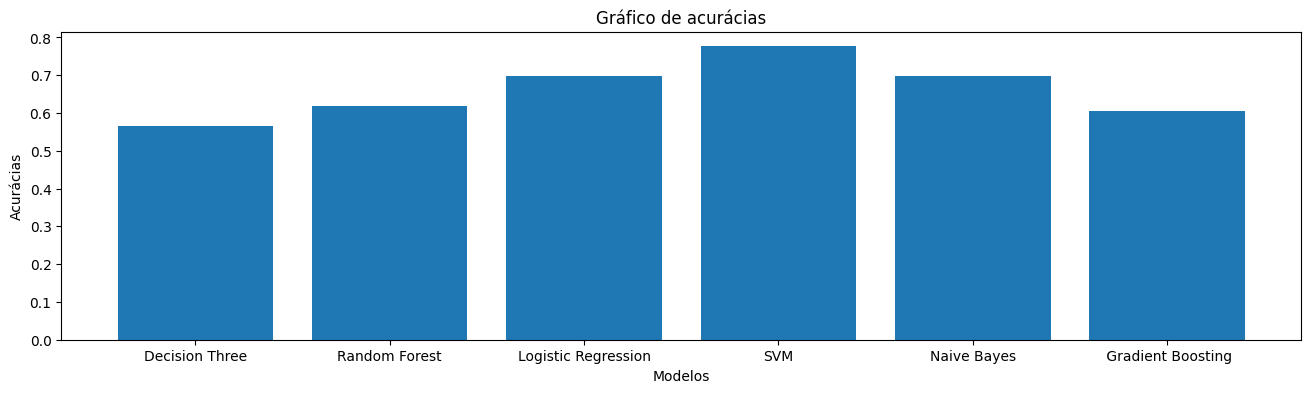

In [6]:
# Gerando gráfico de acurácias

import matplotlib.pyplot as plt
models = ['Decision Three', 'Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes', ' Gradient Boosting']
accuracys = [accuracy_dt, accuracy_rf, accuracy_lr, accuracy_svm, accuracy_nb, accuracy_gb]

plt.figure(figsize=(16, 4))

plt.bar(models, accuracys)

plt.xlabel('Modelos')
plt.ylabel('Acurácias')
plt.title('Gráfico de acurácias')

plt.show()

Validando o modelo

DecisionTree
Acurácia média da validação cruzada : 0.5590163934426229
Desvio padrão da validação cruzada: 0.05296883416853608
RandomForest
Acurácia média da validação cruzada : 0.6808743169398906
Desvio padrão da validação cruzada: 0.03994681285791706
LogisticRegression
Acurácia média da validação cruzada: 0.6514207650273225
Desvio padrão da validação cruzada: 0.0200602276292928
SVM
Acurácia média da validação cruzada: 0.6612021857923496
Desvio padrão da validação cruzada: 0.00691208231730794
NaiveBayes
Acurácia média da validação cruzada: 0.6643169398907104
Desvio padrão da validação cruzada: 0.041023514267602965
GradientBoosting
Acurácia média da validação cruzada: 0.6314207650273225
Desvio padrão da validação cruzada: 0.0555955542951056


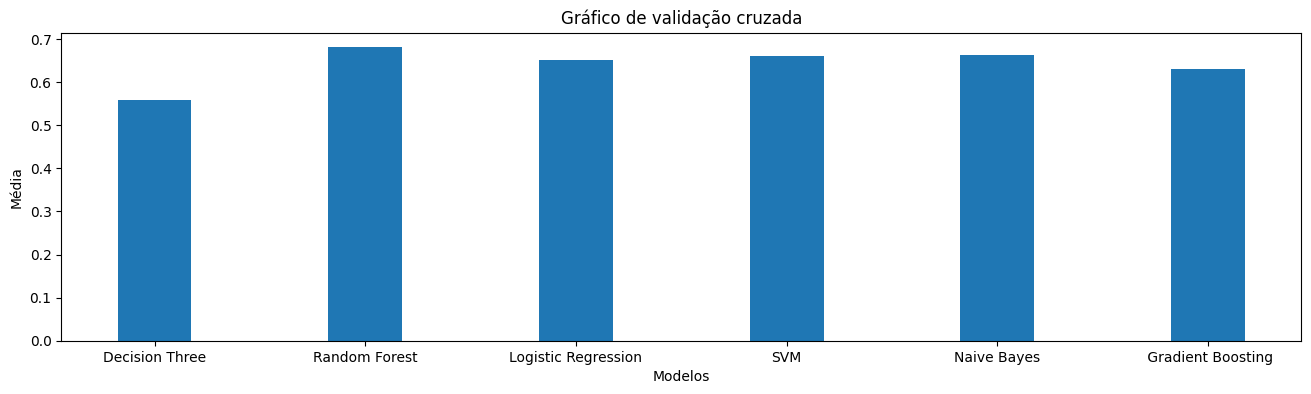

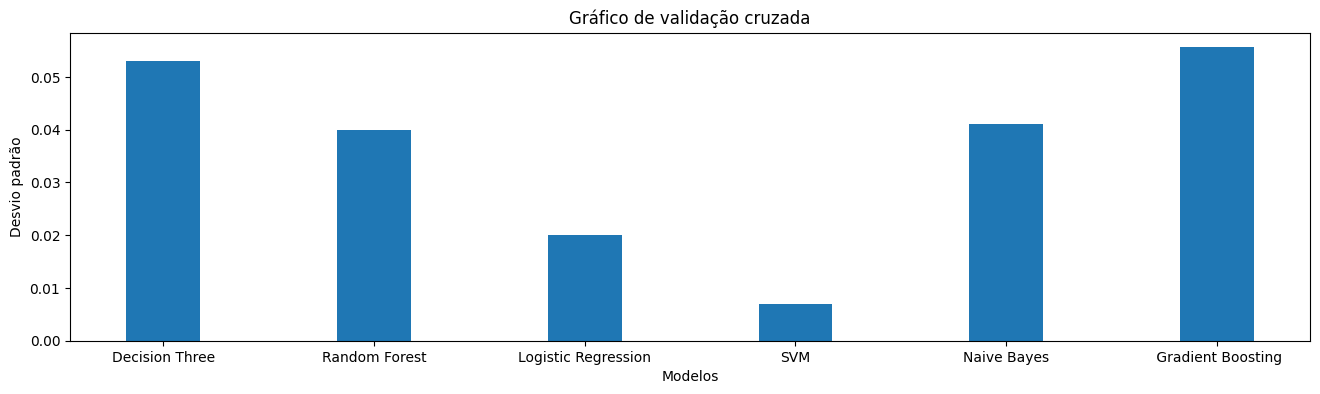

In [7]:
from sklearn.model_selection import cross_val_score

# Aplicando validação cruzada Decision Tree
scores_dt = cross_val_score(model, X_train, y_train, cv=5)
print("DecisionTree")
print("Acurácia média da validação cruzada :", scores_dt.mean())
print("Desvio padrão da validação cruzada:", scores_dt.std())

#####################

# Aplicando validação cruzada Random Forest
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)
print("RandomForest")
print("Acurácia média da validação cruzada :", scores_rf.mean())
print("Desvio padrão da validação cruzada:", scores_rf.std())

#####################

# Aplicando validação cruzada Logistic Regression
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5)
print("LogisticRegression")
print("Acurácia média da validação cruzada:", scores_lr.mean())
print("Desvio padrão da validação cruzada:", scores_lr.std())

#####################

# Aplicando validação cruzada SVM
scores_svm = cross_val_score(model_svm, X_train, y_train, cv=5)
print("SVM")
print("Acurácia média da validação cruzada:", scores_svm.mean())
print("Desvio padrão da validação cruzada:", scores_svm.std())

#####################

# Aplicando validação cruzada Naive Bayes
scores_nb = cross_val_score(model_nb, X_train, y_train, cv=5)
print("NaiveBayes")
print("Acurácia média da validação cruzada:", scores_nb.mean())
print("Desvio padrão da validação cruzada:", scores_nb.std())

#####################

# Aplicando validação cruzada Naive Bayes
scores_gb = cross_val_score(model_gb, X_train, y_train, cv=5)
print("GradientBoosting")
print("Acurácia média da validação cruzada:", scores_gb.mean())
print("Desvio padrão da validação cruzada:", scores_gb.std())

# Gerando gráfico da validação cruzada
# import matplotlib.pyplot as plt
models = ['Decision Three', 'Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes', ' Gradient Boosting']
means = [scores_dt.mean(), scores_rf.mean(), scores_lr.mean(), scores_svm.mean(), scores_nb.mean(), scores_gb.mean()]


plt.figure(figsize=(16, 4))

width_bar = 0.35  # Largura das barras

# Posições das barras no eixo x
mean_bar_position = np.arange(len(models))
std_bar_position = mean_bar_position + width_bar

plt.bar(models, means, width_bar)

plt.xlabel('Modelos')
plt.ylabel('Média')
plt.title('Gráfico de validação cruzada')

plt.show()

stds = [scores_dt.std(), scores_rf.std(), scores_lr.std(), scores_svm.std(), scores_nb.std(), scores_gb.std()]

plt.figure(figsize=(16, 4))
plt.bar(models, stds, width_bar)
plt.xlabel('Modelos')
plt.ylabel('Desvio padrão')
plt.title('Gráfico de validação cruzada')

plt.show()


In [8]:
# Dados de teste ou novos dados para prever
new_data = test_data 

# Aplicando as mesmas etapas de pré-processamento nas novas entradas
# ...
# Pré-processamento dos novos dados

# Realizando as previsões
new_features = new_data[features]
predictions = model.predict(new_features)

# Exibindo as previsões
print("Previsões:")
new_data['prediction_result'] = predictions
new_data['correct_prediction'] = np.where((new_data['prediction_result'] == new_data['both_scores_nonzero']), 1, 0)


correct_prediction_count = new_data['correct_prediction'].cumsum()
new_data['correct_prediction_count'] = correct_prediction_count

final_correct_count = new_data['correct_prediction_count'].iloc[-1]

final_correct_count

Previsões:


43

Correlação em relação a "both_scores_nonzero"
both_scores_nonzero     1.000000
shots_on_target_away    0.289971
total_shots_away        0.112502
shots_on_target_home    0.091800
possession_away         0.070097
duels_won_home          0.020808
total_shots_home       -0.002617
duels_won_away         -0.020253
possession_home        -0.070097
home_wins              -0.186371
Name: both_scores_nonzero, dtype: float64


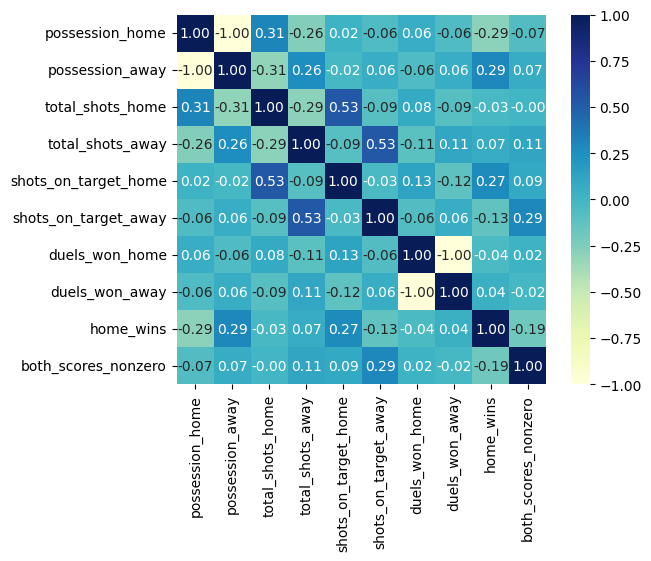

In [27]:
# Utilizando o modelo treinado para validar a base de jogos da serie B

data2 = pd.read_csv('./matches_brasileirao_serie_b_2022.csv')
parsed_data2 = data2.drop(
  labels=['team_name_home', 'team_name_away', 'stage', 'match_id', 'date', 'location', 'lineup_home', 'lineup_away', 'player_names_home', 'player_numbers_home', 'player_names_away', 'player_numbers_away', 'prediction_team_home_win', 'prediction_draw', 'prediction_team_away_win', 'prediction_quantity'],
  axis=1)

parsed_data2['home_wins'] = np.where((parsed_data2['team_home_score'] > parsed_data2['team_away_score']), 1, 0)
parsed_data2['both_scores_nonzero'] = np.where((parsed_data2['team_home_score'] != 0) & (parsed_data2['team_away_score']!=0), 1, 0)

parsed_data2 = parsed_data2.drop(
  labels=['team_home_score', 'team_away_score'],
  axis=1)

# Verficando a correlação dos atributos
import seaborn as sns
sns.heatmap(data=parsed_data2.corr(method='spearman'), annot=True, cmap='YlGnBu', fmt='.2f', square=True)

# Verificando a correlação dos atributos em relação a classe 'both_scores_nonzero'  
correlations = parsed_data2.corr(method='spearman')['both_scores_nonzero']
correlations_sorted = correlations.sort_values(ascending=False)
print('Correlação em relação a "both_scores_nonzero"')
print(correlations_sorted)

In [10]:

# Fazendo previsões no conjunto de teste
predictions2 = model.predict(parsed_data2[features])

# Calculando a acurácia do modelo
accuracy = accuracy_score(parsed_data2[target], predictions2)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.5473684210526316


In [11]:
# Exibindo as previsões
print("Previsões:")

parsed_data2['prediction_result'] = predictions2
parsed_data2['correct_prediction'] = np.where((parsed_data2['prediction_result'] == parsed_data2['both_scores_nonzero']), 1, 0)


correct_prediction_count = parsed_data2['correct_prediction'].cumsum()
parsed_data2['correct_prediction_count'] = correct_prediction_count

final_correct_count = parsed_data2['correct_prediction_count'].iloc[-1]

parsed_data2

Previsões:


,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,home_wins,both_scores_nonzero,prediction_result,correct_prediction,correct_prediction_count
0,0.66,0.34,24,16,9,4,0.56,0.44,1,1,1,1,1
1,0.60,0.40,7,8,3,4,0.49,0.52,0,0,0,1,2
2,0.64,0.36,22,11,6,6,0.48,0.52,0,0,1,0,2
3,0.46,0.54,15,8,3,0,0.55,0.45,0,0,0,1,3
4,0.47,0.53,6,16,2,5,0.51,0.49,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.45,0.55,7,10,0,2,0.49,0.51,0,0,0,1,207
376,0.52,0.48,13,15,2,3,0.49,0.51,0,1,0,0,207
377,0.38,0.62,14,11,3,1,0.49,0.52,1,0,0,1,208
378,0.61,0.39,12,16,4,5,0.49,0.51,0,1,0,0,208
